In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helper import *
from sdlbfgs import *

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [5]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('', download=True, train=False, transform=transform)

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [4]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# CURVEBALL minibatch



In [6]:
minibatch_size_grid = [256, 512, 1024]
epochs = 15

### CNN

In [ ]:
results =hyperparameters_tuning_Curveball_minibatch(trainset,valset,minibatch_size_grid, epochs, "CNN")

Minibatch size:  2048
Epoch 0


In [ ]:
minibatch_size_grid = [ 512]
max_iter_grid = [  5 ]

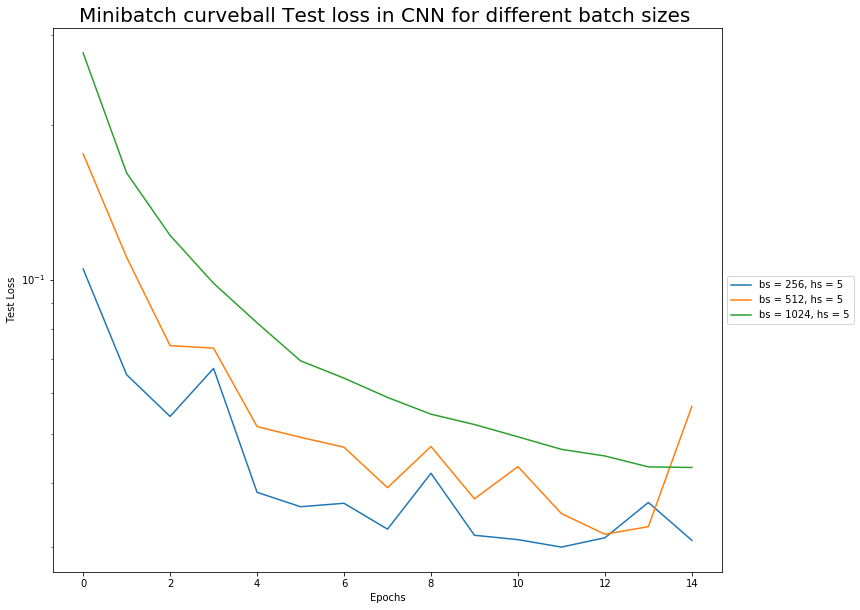

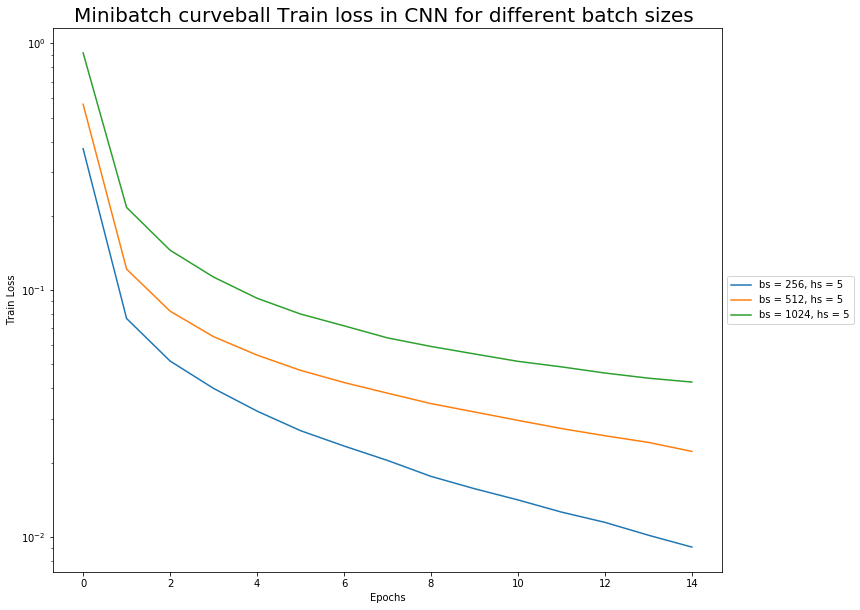

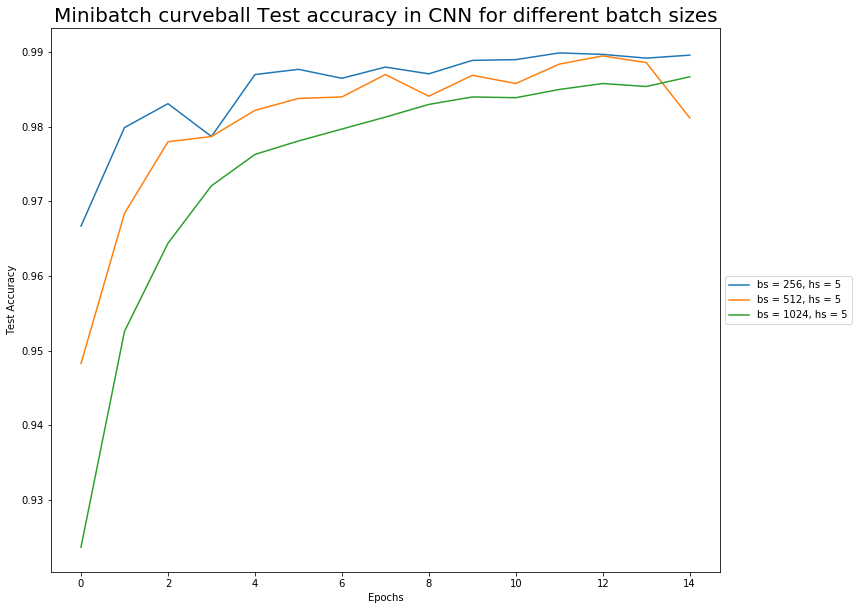

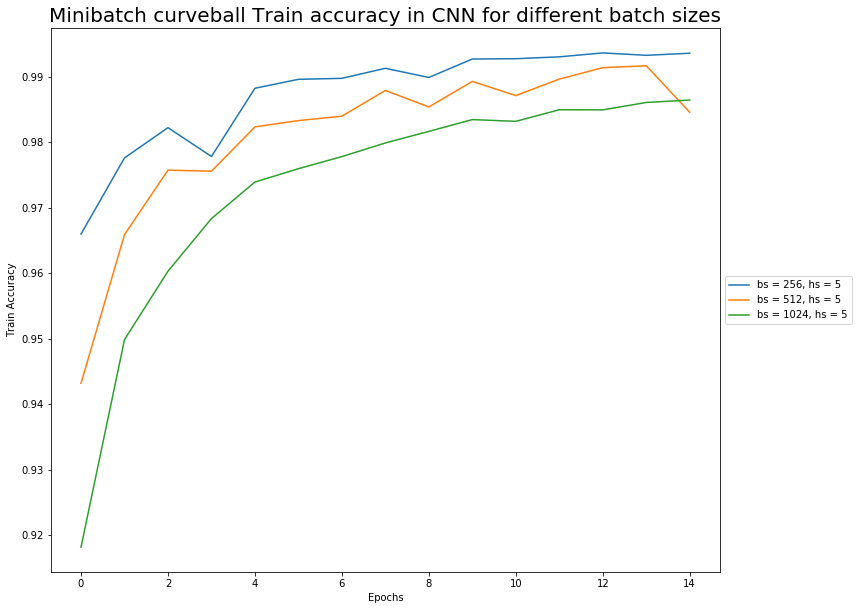

In [8]:
i=0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(max_iter_grid):
        plt.figure(1, figsize = (12,10))
        plt.semilogy(results[3][i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (12,10))
        plt.semilogy(results[1][i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (12,10))
        plt.plot(results[4][i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (12,10))
        plt.plot(results[2][i],label='bs = {}, hs = {}'.format(bs,hs))
        i=i+1
plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch curveball Test loss in CNN for different batch sizes ',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_new_test_loss_CNN_BN.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch curveball Train loss in CNN for different batch sizes ',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_new_train_loss_CNN_BN.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch curveball Test accuracy in CNN for different batch sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_new_test_acc_CNN_BN.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch curveball Train accuracy in CNN for different batch sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_new_train_acc_CNN_BN.jpg")


In [9]:
np.savetxt('Curveball_minibatch_CNN_trainloss.txt', results[1])
np.savetxt('Curveball_minibatch_CNN_testloss.txt', results[3])
np.savetxt('Curveball_minibatch_CNN_trainacc.txt', results[2])
np.savetxt('Curveball_minibatch_CNN_testacc.txt', results[4])
np.savetxt('Curveball_minibatch_CNN_times.txt',results[5])